# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Step 0: Load The Data

The data for this project is divided into three main categories:
* Training data, which is the one we use to train our model.
* Validation data is the data we use in order to see how well our model is performing during training.
* Testing data is the data that we use after training in order to measure the final accuracy of our project.

It's very important that all data sets are disjoint because we want to train a model that will be able to perform well in unseen scenarios.

Additionally, we have a table that contains the name associated with each output label. For example, 0 => Speed limit (20km/h).

In [116]:
from collections import namedtuple
import csv
import numpy as np
import pickle
from typing import Tuple

class Error(Exception):
    """Errors generated in this module."""
    pass

DataFilenames = namedtuple('DataFilenames', ['training', 'validation', 'testing', 'sign_names'])

class Data(object):
    """Class that holds all the data we need for this project."""

    def __init__(self, data_filenames: DataFilenames):
        with open(data_filenames.training, mode='rb') as f:
            self._train = pickle.load(f)
        with open(data_filenames.validation, mode='rb') as f:
            self._valid = pickle.load(f)
        with open(data_filenames.testing, mode='rb') as f:
            self._test = pickle.load(f)

        sign_table = []
        with open(data_filenames.sign_names, 'r') as csv_file:
            reader = csv.reader(csv_file)
            next(reader, None)  # Skip the header
            for row in reader:
                # Let's make sure we have the expected number of pieces per row, which is
                # an index and the label of such index. Additionally, since we are putting
                # all the sign names into a flat array (and not a map), we need to make sure
                # each index we read from the file matches the position we are going to put
                # the sign name at.
                assert(len(row) == 2 and int(row[0]) == len(sign_table))
                sign_table.append(row[1])
        self._sign_table = np.array(sign_table)

    def train_data(self) -> Tuple[np.array, np.array]:
        return self._train['features'], self._train['labels']

    def n_train(self) -> int:
        return len(self._train['features'])

    def valid_data(self) -> Tuple[np.array, np.array]:
        return self._valid['features'], self._valid['labels']

    def n_valid(self) -> int:
        return len(self._valid['features'])

    def test_data(self) -> Tuple[np.array, np.array]:
        return self._test['features'], self._test['labels']

    def n_test(self) -> int:
        return len(self._test['features'])

    def sign_name(self, idx: int) -> str:
        if idx < 0 or idx >= self.n_classes():
            raise Error("idx should be between 0 and {}, but got {}".format(self.n_classes() - 1, idx))
        return self._sign_table[idx]

    def n_classes(self) -> int:
        return len(self._sign_table)

data_filenames = DataFilenames(training='data/train.p',
                               validation='data/valid.p',
                               testing='data/test.p',
                               sign_names='signnames.csv')
data = Data(data_filenames)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [117]:
def print_data_set_summary(data: Data) -> None:
    print("Number of training examples =", data.n_train())
    print("Number of validating examples =", data.n_valid())
    print("Number of testing examples =", data.n_test())
    X_train, y_train = data.train_data()
    assert(len(X_train) > 0)
    print("Image data shape =", X_train[0].shape)
    print("Number of classes =", data.n_classes())

print_data_set_summary(data)

Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

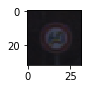

The displayed sign is "Speed limit (60km/h)"


In [3]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

def display_random_image(data: Data) -> None:
    """Displays a randomly selected image from the training set."""
    X_train, y_train = data.train_data()
    index = random.randint(0, len(X_train) - 1)
    image = X_train[index].squeeze()

    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    plt.show()
    print("The displayed sign is \"{}\"".format(data.sign_name(y_train[index])))

display_random_image(data)

Let's show the distribution of the different data sets.

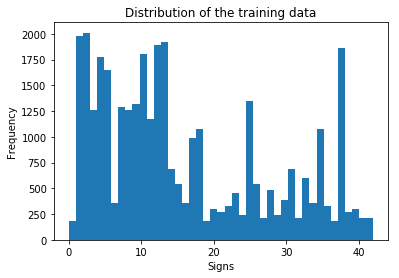

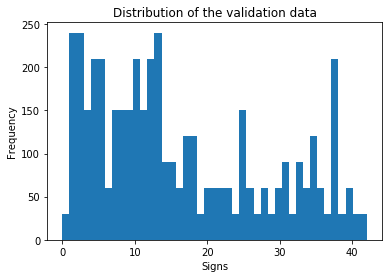

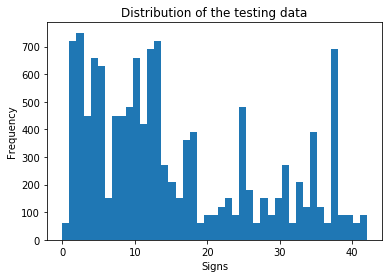

In [4]:
def show_distribution(y: np.array, n_classes: int, label: str) -> None:
    plt.xlabel('Signs')
    plt.ylabel('Frequency')
    plt.title('Distribution of the {} data'.format(label))
    plt.hist(y, bins=data.n_classes())
    plt.show()

show_distribution(data.train_data()[1], data.n_classes(), 'training')
show_distribution(data.valid_data()[1], data.n_classes(), 'validation')
show_distribution(data.test_data()[1], data.n_classes(), 'testing')

As you can see, the distribution of the training, validation and testing sets are similar. However, it's worth noticing that some labels don't contain a high number of examples. For example, the label 0 only contains 180 examples in the training set, while others contain magnitudes more. Therefore, we may need to collect or generate more data if we a model that will be able to classify those labels with low frequency, with enough precision.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Noise functions

As we mentioned in the previous section, we don't have a lot of examples for some particular labels (like label 0). So, we may need to generate more data in order to improve the accuracy of our model. A label is considered low frequency in our pipeline if it's associated with less than 1000 examples.

The noise functions we are going to apply are:
* Rotate the image by a random angle between -10 and 10 degrees (inclusive).
* "Salt and pepper" noise, meaning that we set some random pixels to "white" or "black".
* Gaussian distribution-based noise as described [here](https://en.wikipedia.org/wiki/Gaussian_noise).
* Speckle noise.

Let's take an example on how these transformations would look like.

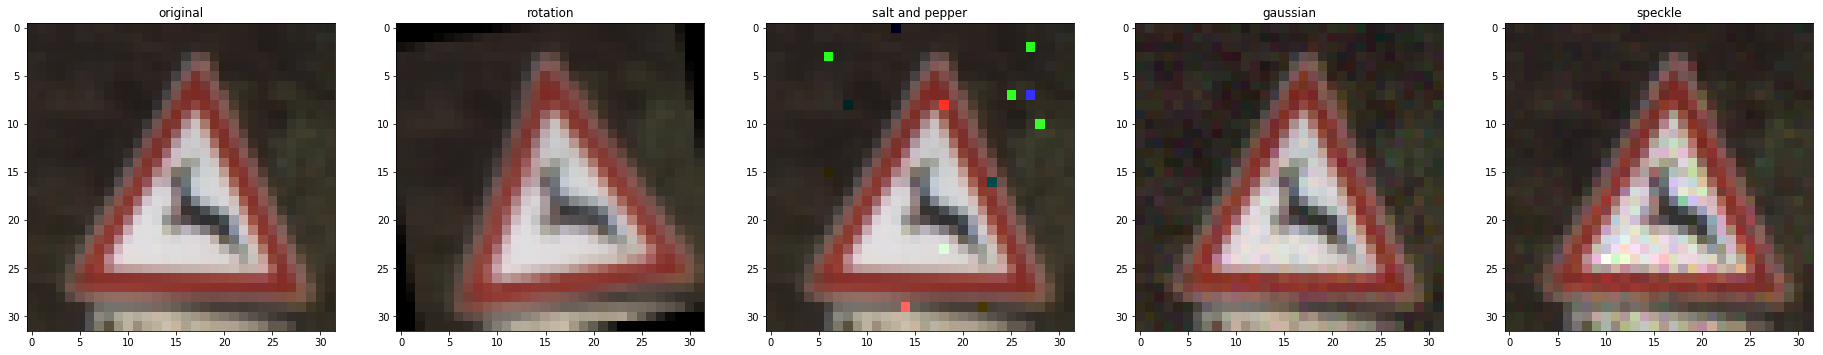

In [5]:
import cv2
import skimage

def rotate_image(img: np.array, angle: int=5) -> np.array:
    """Rotates the given image `angle` degrees."""
    center = tuple(np.array(img.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    result = cv2.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def salt_and_pepper(img: np.array) -> np.array:
    """Applies salt and pepper noise to the given image."""
    return skimage.util.random_noise(img, mode='s&p', amount=0.005)

def gaussian(img: np.array, var: float=0.0005) -> np.array:
    """Applies Gaussian noise to the given image."""
    return skimage.util.random_noise(img, mode='gaussian', var=var)

def speckle(img: np.array, var: float=0.005) -> np.array:
    """Applies Speckle noise to the given image."""
    return skimage.util.random_noise(img, mode='speckle', var=var)

def show_noise_on_image(img: np.array) -> None:
    fig = plt.figure(figsize=(32, 32))
    subplot = fig.add_subplot(1, 5, 1)
    subplot.title.set_text('original')
    plt.imshow(img)

    subplot = fig.add_subplot(1, 5, 2)
    subplot.title.set_text('rotation')
    plt.imshow(rotate_image(img, angle=10))

    subplot = fig.add_subplot(1, 5, 3)
    subplot.title.set_text('salt and pepper')
    plt.imshow(salt_and_pepper(img))

    subplot = fig.add_subplot(1, 5, 4)
    subplot.title.set_text('gaussian')
    plt.imshow(gaussian(img))

    subplot = fig.add_subplot(1, 5, 5)
    subplot.title.set_text('speckle')
    plt.imshow(speckle(img))

show_noise_on_image(data.train_data()[0][500])

As you can see, the introduced noise functions are able to generate images that are similar to the original one, but with some small variations.

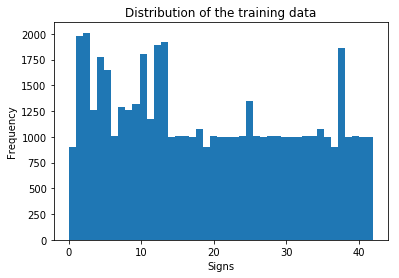

In [6]:
from collections import defaultdict
from typing import List, Tuple

def extend_data_set(x: np.array, y: np.array, low_threshold: int=1000) -> Tuple[np.array, np.array]:
    """Generates fake data in order to have a reasonable frequency for each label in our training set."""
    dist_map = defaultdict(int)
    for label in y:
        dist_map[label] += 1

    new_x = list(x)
    new_y = list(y)
    for img, label in zip(x, y):
        frequency = dist_map[label]
        if frequency > low_threshold:
            continue

        # Rotate image by a random degree between -10 and 10. Remember that randint uses a half open interval.
        rotated_img = rotate_image(img, angle=np.random.randint(-10, high=11))
        new_x.append(rotated_img)
        new_y.append(label)

        salt_and_pepper_img = salt_and_pepper(img)
        new_x.append(salt_and_pepper_img)
        new_y.append(label)

        gaussian_img = gaussian(img)
        new_x.append(gaussian_img)
        new_y.append(label)

        speckle_img = speckle(img)
        new_x.append(speckle_img)
        new_y.append(label)

        dist_map[label] += 4

    return np.array(new_x), np.array(new_y)

def show_new_distribution(data: Data):
    X_train, y_train = data.train_data()
    X_extended_train, y_extended_train = extend_data_set(X_train, y_train)
    show_distribution(y_extended_train, data.n_classes(), 'training')

show_new_distribution(data)

Our distribution looks much better now that we have a reasonable amount of examples for each label. However, we are not going to modify the dataset just yet. We want to run tests with the regular data set and the extended ones and measure the impact of each one on the model accuracy.

#### Normalization

One of the techniques we are going to use in this project to normalize the data is one of the recommended ones: (pixel - 128) / 128. With that normalization we are moving from the [0, 256] range to the [-1, 1] range.

In [7]:
from sklearn.utils import shuffle
import cv2

def naive_normalization(x: np.array) -> np.array:
    return (x - 128.0) / 128.0

def show_naive_normalization_example() -> None:
    x = np.array([256.0, 64.0, 0, 128.0])
    normalized_x = naive_normalization(x)
    print("The initial array is {} and the normalized one is {}".format(x, normalized_x))

show_naive_normalization_example()

The initial array is [256.  64.   0. 128.] and the normalized one is [ 1.  -0.5 -1.   0. ]


#### Grayscale

For now we are not applying grayscale to our images since we don't know if the color may be a relevant factor.

### Model Architecture

Our convolutional network architecture is based on [this paper](writeup/lecun_paper.pdf). More specifically, the architecture we want to use for this project is

![Model architecture](writeup/architecture.png)

In [8]:
from collections import namedtuple
import enum
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from typing import List, Tuple

def new_weight(shape: List[int], mu: float=0.0, sigma: float=0.1, name=None) -> tf.Tensor:
    """Returns a tensor with the given shape that contains elements from a normal distribution."""
    return tf.Variable(tf.truncated_normal(shape, mean=mu, stddev=sigma), name=name)

def new_bias(n: int, name=None) -> tf.Tensor:
    return tf.Variable(tf.zeros(n), name=name)

class ActivationFunction(enum.Enum):
    """Enum that represents our activation function (either relu or tanh)."""
    RELU = enum.auto()
    TANH = enum.auto()


class ConvNetArchitecture(object):
    """Class that implements a variation of LeNet architecture."""

    def __init__(self, n_classes: int, activation_function: ActivationFunction=ActivationFunction.RELU):
        self._activation_fn = tf.nn.relu
        if activation_function == ActivationFunction.TANH:
            self._activation_fn = tf.nn.tanh

        # Initialize weights and biases.
        self._weights_and_biases = {
            'L1': (new_weight([5, 5, 3, 6], name='w1'), new_bias(6, name='b1')),
            'L2': (new_weight([5, 5, 6, 16], name='w2'), new_bias(16, name='b2')),
            'L3': (new_weight([5, 5, 16, 400], name='w3'), new_bias(400, name='b3')),
            'L4': (new_weight([2000, n_classes], name='w4'), new_bias(n_classes, name='b4')),
        }

    def _first_layer(self, x: tf.Tensor) -> tf.Tensor:
        """Generates the first layer.

        This layer takes a ?x32x32x3 tensor and applies a convolution, activation and a pooling layer.
        The output is a ?x28x28x6 tensor.
        """
        # Convolution. Input = ?x32x32x(1 or 3). Output = ?x28x28x6
        weight, bias = self._weights_and_biases['L1']
        conv = tf.nn.bias_add(tf.nn.conv2d(x, weight, [1, 1, 1, 1], padding='VALID'), bias)
        # Activation. Input = ?x28x28x6. Output = ?x28x28x6
        act = self._activation_fn(conv)
        # Pooling. Input = ?x28x28x6. Output = ?x14x14x6
        return tf.nn.max_pool(act, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    def _second_layer(self, x: tf.Tensor) -> tf.Tensor:
        """Generates the second layer.

        This layer takes a ?x14x14x6 tensor and applies a convolution and a activation layer.
        The output is a ?x10x10x16 tensor.
        """
        # Convolution. Input = ?x14x14x6. Output = ?x10x10x16
        weight, bias = self._weights_and_biases['L2']
        conv = tf.nn.bias_add(tf.nn.conv2d(x, weight, [1, 1, 1, 1], padding='VALID'), bias)
        # Activation. Input = ?x10x10x16. Output = ?x10x10x16
        return self._activation_fn(conv)

    def _third_layer(self, x: tf.Tensor, keep_prob: tf.Tensor) -> tf.Tensor:
        """Generates the third layer.

        This layer takes a ?x10x10x16 tensor and applies a .
        The output is a ?x2000 tensor.
        """
        # Pooling. Input: ?x10x10x16. Output = ?x5x5x16
        pool = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        # Convolution. Input = ?x5x5x16. Output = ?x1x1x400
        weight, bias = self._weights_and_biases['L3']
        conv = tf.nn.bias_add(tf.nn.conv2d(pool, weight, [1, 1, 1, 1], padding='VALID'), bias)
        act = self._activation_fn(conv)

        concat = tf.concat([flatten(act), flatten(x)], 1)
        return tf.nn.dropout(concat, keep_prob)

    def _fourth_layer(self, x: tf.Tensor) -> tf.Tensor:
        """Generates the fourth layer.

        This layer takes a ?x2000 tensor and applies a fully connected layer.
        The output is a ?x`n_classes` tensor.
        """
        # Fully Connected. Input = 2000. Output = `n_classes`
        weight, bias = self._weights_and_biases['L4']
        return tf.add(tf.matmul(x, weight), bias, name='logits')

    def apply(self, x: tf.Tensor, keep_prob: tf.Tensor) -> Tuple[tf.Tensor, tf.Tensor]:
        """Returns the logits tensor and a regularization tensor based on each layer's weights.

        Structure is based on http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf.
        """
        x = self._first_layer(x)
        x = self._second_layer(x)
        x = self._third_layer(x, keep_prob)
        logits = self._fourth_layer(x)

        reg = sum([tf.nn.l2_loss(weight) for weight, bias in self._weights_and_biases.values()])
        return logits, reg

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [9]:
import os
from typing import Callable, Tuple

def preprocess_data(xy: Tuple[np.array, np.array]) -> Tuple[np.array, np.array]:
    """Applies some preprocessing techniques in order to improve the accuracy of our model."""
    X, y = xy
    norm_X = naive_normalization(X)
    return shuffle(norm_X, y)

class TrainingPipeline(object):
    def __init__(self,
                 architecture: ConvNetArchitecture,
                 n_classes: int,
                 epochs: int=10,
                 batch_size: int=128,
                 learning_rate: float=0.001,
                 regularization_rate: float=0.0,
                 keep_prob: float=0.5):
        self._architecture = architecture
        self._n_classes = n_classes

        # Hyperparameters of the training pipeline.
        self._epochs = epochs
        self._batch_size = batch_size
        self._learning_rate = learning_rate
        self._regularization_rate = regularization_rate
        self._keep_prob = keep_prob

        # List of input tensors we need in our model.
        self._x_tf = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
        self._y_tf = tf.placeholder(tf.int32, (None), name='y')
        self._keep_prob_tf = tf.placeholder(tf.float32, name='keep_prob')

    def _evaluate_accuracy(self, accuracy_operation: tf.Tensor, X_data: np.array, y_data: np.array) -> float:
        """Evaluates the accuracy of our model given certain data.

        The accuracy is expressed as the number of examples correctly analyzed divided by the total
        number of examples.
        """
        sess = tf.get_default_session()

        num_examples = len(X_data)
        total_accuracy = 0
        for offset in range(0, num_examples, self._batch_size):
            batch_x, batch_y = X_data[offset: offset + self._batch_size], y_data[offset: offset + self._batch_size]
            # During the evaluation phase, we don't want to drop any "neurons", that's why we set the
            # keep probability to 100%.
            accuracy = sess.run(accuracy_operation,
                                feed_dict={self._x_tf: batch_x, self._y_tf: batch_y, self._keep_prob_tf: 1.0})
            total_accuracy += (accuracy * len(batch_x))
        return total_accuracy / num_examples

    def train(self,
              data: Data,
              data_preprocessing: Callable=preprocess_data,
              model_filename: str=None,
              verbose: bool=False) -> float:
        """Trains our model using the given data.

        Args:
            data: the data we should use in order to train our model.
            data_preprocessing: an optional function that applies some preprocessing on the given data.
            model_filename: if specified, the resulting model will be saved in the given location.
            verbose: if enabled, we would print some debug information.

        Returns:
            A float that represents the accuracy of the model in the test set.
        """
        # Before starting training our model, we may need to preprocess our data in a certain way.
        X_train, y_train = data_preprocessing(data.train_data())
        X_valid, y_valid = data_preprocessing(data.valid_data())
        X_test, y_test = data_preprocessing(data.test_data())

        # We need to use one hot encoding (https://en.wikipedia.org/wiki/One-hot)
        one_hot_y = tf.one_hot(self._y_tf, self._n_classes)
        logits, regs = self._architecture.apply(self._x_tf, self._keep_prob_tf)
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
        loss_operation = tf.reduce_mean(cross_entropy + self._regularization_rate * regs)
        optimizer = tf.train.AdamOptimizer(learning_rate=self._learning_rate)
        training_operation = optimizer.minimize(loss_operation)
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        saver = tf.train.Saver()
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train)

            if verbose:
                print("Training...")
                print()
            for i in range(self._epochs):
                X_train, y_train = shuffle(X_train, y_train)
                for offset in range(0, num_examples, self._batch_size):
                    end = offset + self._batch_size
                    batch_x, batch_y = X_train[offset: end], y_train[offset: end]
                    sess.run(training_operation,
                             feed_dict={
                                 self._x_tf: batch_x,
                                 self._y_tf: batch_y,
                                 self._keep_prob_tf: self._keep_prob})

                validation_accuracy = self._evaluate_accuracy(accuracy_operation, X_valid, y_valid)
                if verbose:
                    print("EPOCH {} ...".format(i+1))
                    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                    print()

            test_accuracy = self._evaluate_accuracy(accuracy_operation, X_test, y_test)
            if verbose:
                print("Test Accuracy = {:.3f}".format(test_accuracy))
                print()

            if model_filename:
                saver.save(sess, model_filename)
                if verbose:
                    print("Model saved at {}".format(model_filename))

            return test_accuracy

In [10]:
def run_default_pipeline(data: Data):
    default_pipeline = TrainingPipeline(ConvNetArchitecture(data.n_classes()), data.n_classes())
    accuracy = default_pipeline.train(data,
                                      model_filename='./models/default',
                                      verbose=True)
    print("The accuracy of the default model is {}".format(accuracy))

run_default_pipeline(data)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Training...

EPOCH 1 ...
Validation Accuracy = 0.843

EPOCH 2 ...
Validation Accuracy = 0.893

EPOCH 3 ...
Validation Accuracy = 0.918

EPOCH 4 ...
Validation Accuracy = 0.921

EPOCH 5 ...
Validation Accuracy = 0.931

EPOCH 6 ...
Validation Accuracy = 0.929

EPOCH 7 ...
Validation Accuracy = 0.933

EPOCH 8 ...
Validation Accuracy = 0.952

EPOCH 9 ...
Validation Accuracy = 0.942

EPOCH 10 ...
Validation Accuracy = 0.935

Test Accuracy = 0.926

Model saved at ./models/default
The accuracy of the default model is 0.9260490896488501


In [61]:
def evaluate(X: np.array, model_filename: str, n_classes: int) -> np.array:
    """Evaluates the given input on the trained data."""
    tf.reset_default_graph()
    x_tf = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
    keep_prob_tf = tf.placeholder(tf.float32, name='keep_prob')
    # TODO: Ugly fix. We need to reinstantiate the architecture in order to get the logits needed for evaluation.
    # We cannot pass the architecture because we are reseting the default graph and both the architecture and
    # the pipeline need to be on the same graph.
    arch = ConvNetArchitecture(n_classes)
    logits, _ = arch.apply(x_tf, keep_prob_tf)
    prediction = tf.argmax(logits, 1)

    restorer = tf.train.Saver()
    with tf.Session() as sess:
        restorer.restore(sess, model_filename)
        return sess.run(prediction,
                        feed_dict={
                            x_tf: X,
                            keep_prob_tf: 1.0})
    return predicted_y

def run_evaluate_example(data: Data):
    X, y = data.train_data()[0][0], data.train_data()[1][0]
    norm_X = naive_normalization(np.array([X]))
    prediction = evaluate(norm_X, './models/default', data.n_classes())[0]
    print("The model prediction is {} and the expected value is {}".format(prediction, y))

run_evaluate_example(data)

INFO:tensorflow:Restoring parameters from ./models/default
The model prediction is 41 and the expected value is 41


Now let's train different models using different parameters.

In [21]:
def train_models(data: Data):
    """Trains different models."""
    n_classes = data.n_classes()

    tf.reset_default_graph()
    tanh_pipeline = TrainingPipeline(ConvNetArchitecture(n_classes, activation_function=ActivationFunction.TANH),
                                     n_classes)
    print("The tanh pipeline accuracy is {}".format(
        tanh_pipeline.train(data, model_filename='./models/default_tanh')))

    tf.reset_default_graph()
    pipeline_30_epochs_0_01_reg = TrainingPipeline(ConvNetArchitecture(n_classes),
                                                   n_classes,
                                                   epochs=30,
                                                   regularization_rate=0.01)
    print("The 30 epochs and 0.01 regularization pipeline accuracy is {}".format(
        pipeline_30_epochs_0_01_reg.train(data, model_filename='./models/30_epochs_0_01_regularization')))

    tf.reset_default_graph()
    pipeline_30_epochs_0_001_reg = TrainingPipeline(ConvNetArchitecture(n_classes),
                                                    n_classes,
                                                    epochs=30,
                                                    regularization_rate=0.001)
    print("The 30 epochs and 0.001 regularization pipeline accuracy is {}".format(
        pipeline_30_epochs_0_001_reg.train(data, model_filename='./models/30_epochs_0_001_regularization')))

    tf.reset_default_graph()
    pipeline_0_01_learning = TrainingPipeline(ConvNetArchitecture(n_classes), n_classes, learning_rate=0.01)
    print("The 0.01 learning pipeline accuracy is {}".format(
        pipeline_0_01_learning.train(data, model_filename='./models/0_01_learning')))

    tf.reset_default_graph()
    pipeline_40_epochs_0_0005_reg = TrainingPipeline(ConvNetArchitecture(n_classes),
                                                     n_classes,
                                                     epochs=40,
                                                     regularization_rate=0.0005)
    print("The 40 epochs and 0.0005 regularization pipeline accuracy is {}".format(
        pipeline_40_epochs_0_0005_reg.train(data, model_filename='./models/40_epochs_0_0005_regularization')))

    tf.reset_default_graph()
    default_30_epochs_pipeline = TrainingPipeline(ConvNetArchitecture(n_classes), n_classes, epochs=30)
    print("The 30 epochs default pipeline accuracy is {}".format(
        default_30_epochs_pipeline.train(data, model_filename='./models/30_epochs_default')))

train_models(data)

The tanh pipeline accuracy is 0.923673792623473
The 30 epochs and 0.01 regularization pipeline accuracy is 0.8991290579404703
The 30 epochs and 0.001 regularization pipeline accuracy is 0.9380047507731573
The 0.01 learning pipeline accuracy is 0.9013460015740927
The 40 epochs and 0.0005 regularization pipeline accuracy is 0.9395091054464085
The 30 epochs default pipeline accuracy is 0.9361045132434661


As you can see, the model with the highest accuracy is the one trained in 40 epochs with 0.0005 regularization rate. That's the model we are going to use in order to test new images.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

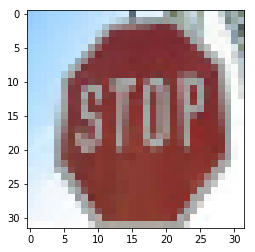

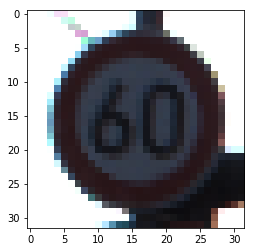

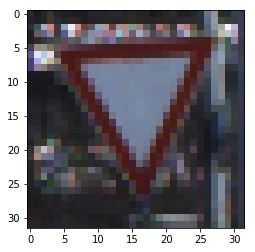

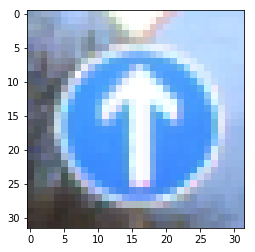

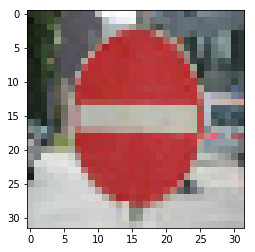

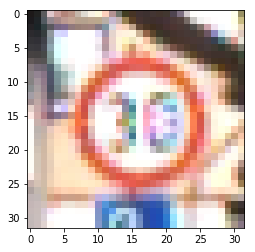

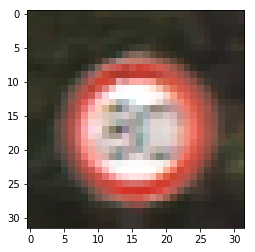

In [122]:
import glob

def get_new_images() -> np.array:
    X = []

    for filename in glob.glob('test/*.png'):
        image = cv2.resize(cv2.imread(filename), (32, 32))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X.append(image)

    return np.array(X)

def show_new_images(X: np.array):
    for image in X:
        plt.imshow(image)
        plt.show()

show_new_images(get_new_images())

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./models/40_epochs_0_0005_regularization


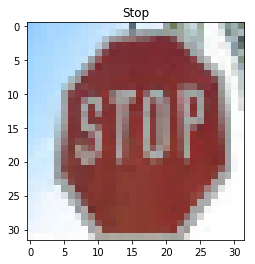

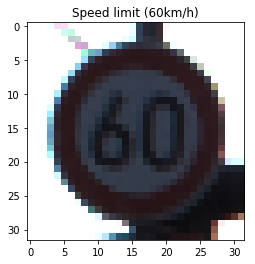

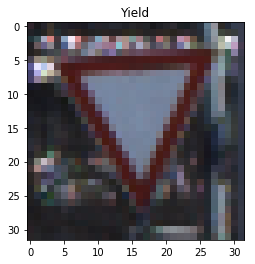

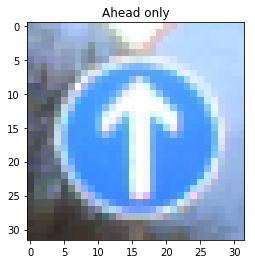

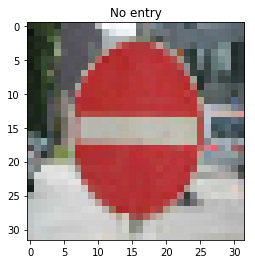

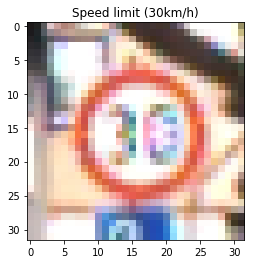

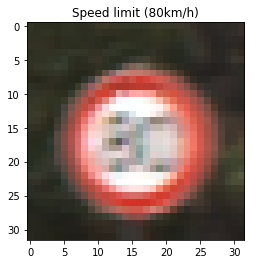

In [123]:
def print_new_images_predictions(data: Data):
    X = get_new_images()
    norm_X = naive_normalization(X)
    predictions = evaluate(norm_X, './models/40_epochs_0_0005_regularization', data.n_classes())
    for image, prediction in zip(X, predictions):
        plt.title(data.sign_name(prediction))
        plt.imshow(image)
        plt.show()

print_new_images_predictions(data)

### Analyze Performance

As you can see, our pipeline correctly identified all images correctly, meaning that the model had an accuracy of 100% for the new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./models/40_epochs_0_0005_regularization


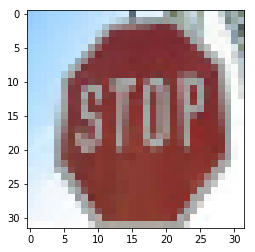

The top 5 options for this image are ['Class Stop with probability 0.9953418970108032', 'Class Speed limit (20km/h) with probability 0.001570996129885316', 'Class No entry with probability 0.0011368233244866133', 'Class Speed limit (30km/h) with probability 0.00047899034689180553', 'Class General caution with probability 0.00020614403183571994']


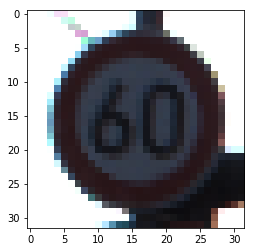

The top 5 options for this image are ['Class Speed limit (60km/h) with probability 0.9975118637084961', 'Class Speed limit (50km/h) with probability 0.002487539779394865', 'Class No passing with probability 1.4090484512507828e-07', 'Class Roundabout mandatory with probability 9.294182490293679e-08', 'Class Slippery road with probability 8.730827261160812e-08']


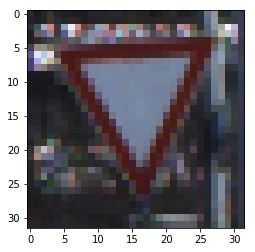

The top 5 options for this image are ['Class Yield with probability 1.0', 'Class Speed limit (60km/h) with probability 3.342016875913789e-13', 'Class Ahead only with probability 2.031858839166012e-13', 'Class No passing with probability 2.991360888919374e-14', 'Class Children crossing with probability 1.8779680975990025e-14']


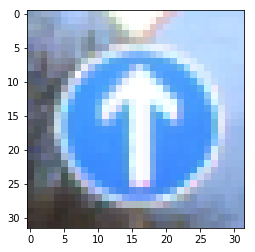

The top 5 options for this image are ['Class Ahead only with probability 1.0', 'Class Go straight or right with probability 4.1921002259803775e-13', 'Class Roundabout mandatory with probability 7.430521990888991e-15', 'Class Keep left with probability 1.6883283050821369e-15', 'Class Turn left ahead with probability 7.620756485238124e-16']


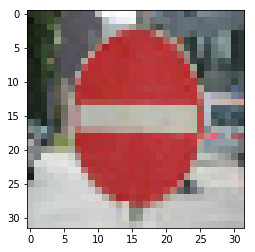

The top 5 options for this image are ['Class No entry with probability 0.9999896287918091', 'Class Stop with probability 1.0346545423089992e-05', 'Class Speed limit (20km/h) with probability 5.875588016124311e-08', 'Class Speed limit (60km/h) with probability 4.244998241809128e-10', 'Class Bumpy road with probability 4.0290690228594883e-10']


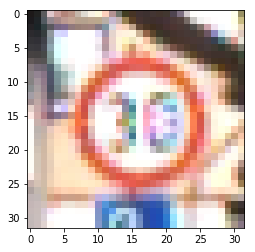

The top 5 options for this image are ['Class Speed limit (30km/h) with probability 0.999987006187439', 'Class Speed limit (70km/h) with probability 1.29794716485776e-05', 'Class Speed limit (20km/h) with probability 4.545992737803317e-08', 'Class Speed limit (50km/h) with probability 2.816904912453233e-12', 'Class Speed limit (80km/h) with probability 1.2211869970107925e-12']


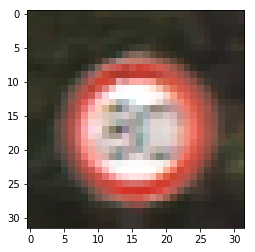

The top 5 options for this image are ['Class Speed limit (80km/h) with probability 0.9999632835388184', 'Class Speed limit (60km/h) with probability 3.660628863144666e-05', 'Class Speed limit (100km/h) with probability 7.627546239064031e-08', 'Class Speed limit (30km/h) with probability 1.7379379713133858e-08', 'Class Speed limit (50km/h) with probability 2.1873205469091772e-09']


In [124]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def get_top(X: np.array, model_filename: str, n_classes: int, top: int=5) -> Tuple[np.array, np.array]:
    """Evaluates the given input on the trained data."""
    tf.reset_default_graph()
    x_tf = tf.placeholder(tf.float32, (None, 32, 32, 3), name='x')
    keep_prob_tf = tf.placeholder(tf.float32, name='keep_prob')
    # TODO: Ugly fix. We need to reinstantiate the architecture in order to get the logits needed for evaluation.
    # We cannot pass the architecture because we are reseting the default graph and both the architecture and
    # the pipeline need to be on the same graph.
    arch = ConvNetArchitecture(n_classes)
    logits, _ = arch.apply(x_tf, keep_prob_tf)
    # Our calculations will be much easier if we normalize the probabilities.
    softmax = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(softmax, k=top)

    restorer = tf.train.Saver()
    with tf.Session() as sess:
        restorer.restore(sess, model_filename)
        return sess.run(top_k, feed_dict={x_tf: X, keep_prob_tf: 1.0})

def run_top_k_example(data: Data):
    X = get_new_images()
    norm_X = naive_normalization(X)
    values, indices = get_top(norm_X, './models/40_epochs_0_0005_regularization', data.n_classes())

    for i in range(len(X)):
        image = X[i]
        value = values[i]
        index = indices[i]
        description = ['Class {} with probability {}'.format(data.sign_name(idx), v) for v, idx in zip(value, index)]

        plt.imshow(image)
        plt.show()
        print('The top 5 options for this image are {}'.format(description))

run_top_k_example(data)
        

As you can see, not only our model has correctly predicted each image, but it also did it with high confidence. Additionally, the other options considered by the model are not far off. For example, our model identified the last image as 'Class Speed limit (80km/h)', however, the image at low resolution could also be confused with 'Class Speed limit (30km/h)', which is the fourth option.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.